In [ ]:
## Equity Portfolio Management

### Data Preparation

Download the historial daily data of the entire 2018 for the 10 stocks 

```python
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']
```

For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk.
https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 9 stocks.

You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe" which is the entire stock market you can trade.


![image.png](attachment:image.png)


### Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

### You start to manage 5 million dollars fund on Jan 02, 2018

You have a strategy to manage the fund.

1. On Jan 02 2018, you split the \\$5m into 5 \\$1m, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was \\$154.25. With \\$1m, you can buy max 6482 shares with cost \\$999848.5 with \\$151.5‬ cash left. You decided to spend \\$1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is \\$5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}


2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 



4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.


6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.


7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.


8. Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.


9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 


In [273]:
#read files
ibm = data.frame(read.csv("IBM.CSV")[,c(1,5,6)])
goog = read.csv("GOOG.CSV")[,c(1,5,6)]
sap = read.csv("SAP.CSV")[,c(1,5,6)]
orcl = read.csv("ORCL.CSV")[,c(1,5,6)]
fb = read.csv("FB.CSV")[,c(1,5,6)]
amzn = read.csv("AMZN.CSV")[,c(1,5,6)]
aapl = read.csv("AAPL.CSV")[,c(1,5,6)]
msft = read.csv("MSFT.CSV")[,c(1,5,6)]
nflx = read.csv("NFLX.CSV")[,c(1,5,6)]
tsla = read.csv("TSLA.CSV")[,c(1,5,6)]

days = 5       #days interval

In [274]:
#put all data in allstocks
#allstocks = data.frame(ibm,msft,goog,aapl,amzn,fb,nflx,tsla,orcl,sap)
allstocks <- data.frame(ibm$Date,ibm$Close,ibm$Adj.Close,
                        msft$Close,msft$Adj.Close,
                        goog$Close,goog$Adj.Close,
                        aapl$Close,aapl$Adj.Close,
                        amzn$Close,amzn$Adj.Close,
                        fb$Close,fb$Adj.Close,
                        nflx$Close,nflx$Adj.Close,
                        tsla$Close,tsla$Adj.Close,
                        orcl$Close,orcl$Adj.Close,
                        sap$Close,sap$Adj.Close,0,0,0,0,0,0,0,0,0,0,0)
colnames(allstocks) = c("date","ibm_close","ibm_adj_close",
                       "msft_close","msft_adj_close",
                        "goog_close","goog_adj_close",
                        "aapl_close","aapl_adj_close",
                        "amzn_close","amzn_adj_close",
                        "fb_close","fb_adj_close",
                        "nflx_close","nflx_adj_close",
                        "tsla_close","tsla_adj_close",
                        "orcl_close","orcl_adj_close",
                        "sap_close","sap_adj_close","mtm",
                        "ibm_div","msft_div","goog_div","aapl_div",
                        "amzn_div","fb_div","nflx_div","tsla_div",
                        "orcl_div","sap_div")

head(allstocks)


,date,ibm_close,ibm_adj_close,msft_close,msft_adj_close,goog_close,goog_adj_close,aapl_close,aapl_adj_close,amzn_close,...,ibm_div,msft_div,goog_div,aapl_div,amzn_div,fb_div,nflx_div,tsla_div,orcl_div,sap_div
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.25,135.7438,85.95,82.59932,1065.00,1065.00,43.0650,41.51358,1189.01,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-03,158.49,139.4751,86.35,82.98373,1082.48,1082.48,43.0575,41.50634,1204.20,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-04,161.70,142.3000,87.11,83.71412,1086.40,1086.40,43.2575,41.69914,1209.59,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-05,162.49,142.9952,88.19,84.75201,1102.23,1102.23,43.7500,42.17389,1229.14,...,0,0,0,0,0,0,0,0,0,0
5,2018-01-08,163.47,143.8576,88.28,84.83849,1106.94,1106.94,43.5875,42.01725,1246.87,...,0,0,0,0,0,0,0,0,0,0
6,2018-01-09,163.83,144.1744,88.22,84.78084,1106.26,1106.26,43.5825,42.01243,1252.70,...,0,0,0,0,0,0,0,0,0,0


In [275]:
#calculate percentage change and send low 5
perchangelow<-function(d){
    diff={}
    nam<-list(ibm,msft,goog,aapl,amzn,fb,nflx,tsla,orcl,sap)
    df<-data.frame(
    names = c("ibm","msft","goog","aapl","amzn","fb","nflx","tsla","orcl","sap"),   stringsAsFactors = FALSE )
    for(j in 1:10){
    diff[j]<- ((nam[[j]]$Adj.Close[d])-(nam[[j]]$Adj.Close[d-days]))/nam[[j]]$Adj.Close[d-days]
    #print(diff[j])
        }
    df$perchange <- diff
    test=df[order(df$perchange,decreasing=TRUE),]
    low5=test[c(6:10),]
    low5
    
}


In [276]:
#calculate percentage change and send high 5
perchangehigh<-function(d){
    diff={}
    nam<-list(ibm,msft,goog,aapl,amzn,fb,nflx,tsla,orcl,sap)
    df<-data.frame(
    names = c("ibm","msft","goog","aapl","amzn","fb","nflx","tsla","orcl","sap"),   stringsAsFactors = FALSE )
    for(j in 1:10){
    diff[j]<- ((nam[[j]]$Adj.Close[d])-(nam[[j]]$Adj.Close[d-days]))/nam[[j]]$Adj.Close[d-days]
    #print(diff[j])
        }
    df$perchange <- diff
    test=df[order(df$perchange,decreasing=TRUE),]
    high5=test[c(1:5),]
    high5
    
}


In [277]:
#Finding "Close_Ratio" and adding it to the dataframe
#IBM
ibm_cl_rat= ibm[-nrow(ibm),2]/ibm[-1,2]
ibm$Close_Ratio = c(0,ibm_cl_rat)
#head(ibm)

#GOOG
goog_cl_rat= goog[-nrow(goog),2]/goog[-1,2]
goog$Close_Ratio = c(0,goog_cl_rat)
#head(goog)

#FB
fb_cl_rat= fb[-nrow(fb),2]/fb[-1,2]
fb$Close_Ratio = c(0,fb_cl_rat)
#head(fb)

#MSFT
msft_cl_rat= msft[-nrow(msft),2]/msft[-1,2]
msft$Close_Ratio = c(0,msft_cl_rat)
#head(msft)

#AMZN
amzn_cl_rat= amzn[-nrow(amzn),2]/amzn[-1,2]
amzn$Close_Ratio = c(0,amzn_cl_rat)
#head(amzn)

#AAPL
aapl_cl_rat= aapl[-nrow(aapl),2]/aapl[-1,2]
aapl$Close_Ratio = c(0,aapl_cl_rat)
#(aapl)

#tsla
tsla_cl_rat= tsla[-nrow(tsla),2]/tsla[-1,2]
tsla$Close_Ratio = c(0,tsla_cl_rat)
#(tsla)

#orcl
orcl_cl_rat= orcl[-nrow(orcl),2]/orcl[-1,2]
orcl$Close_Ratio = c(0,orcl_cl_rat)
#(orcl)

#sap
sap_cl_rat= sap[-nrow(sap),2]/sap[-1,2]
sap$Close_Ratio = c(0,sap_cl_rat)
#(sap)

#nflx
nflx_cl_rat= nflx[-nrow(nflx),2]/nflx[-1,2]
nflx$Close_Ratio = c(0,nflx_cl_rat)
#(nflx)

#Dataframe with "Close_ratio" column displayed below



In [278]:
#Finding "Adj.Close_Ratio" and adding it to the dataframe
#IBM
ibm_adj_rat= ibm[-nrow(ibm),3]/ibm[-1,3]
ibm$Adj.Close_Ratio = c(0,ibm_adj_rat)
#head(ibm)

#GOOG
goog_adj_rat= goog[-nrow(goog),3]/goog[-1,3]
goog$Adj.Close_Ratio = c(0,goog_adj_rat)
#head(goog)

#FB
fb_adj_rat= fb[-nrow(fb),3]/fb[-1,3]
fb$Adj.Close_Ratio = c(0,fb_adj_rat)
#head(fb)

#MSFT
msft_adj_rat= msft[-nrow(msft),3]/msft[-1,3]
msft$Adj.Close_Ratio = c(0,msft_adj_rat)
#head(msft)

#AMZN
amzn_adj_rat= amzn[-nrow(amzn),3]/amzn[-1,3]
amzn$Adj.Close_Ratio = c(0,amzn_adj_rat)
#head(amzn)

#AAPL
aapl_adj_rat= aapl[-nrow(aapl),3]/aapl[-1,3]
aapl$Adj.Close_Ratio = c(0,aapl_adj_rat)
#(aapl)

#tsla
tsla_adj_rat= tsla[-nrow(tsla),3]/tsla[-1,3]
tsla$Adj.Close_Ratio = c(0,tsla_adj_rat)
#(tsla)

#orcl
orcl_adj_rat= orcl[-nrow(orcl),3]/orcl[-1,3]
orcl$Adj.Close_Ratio = c(0,orcl_adj_rat)
#(orcl)

#sap
sap_adj_rat= sap[-nrow(sap),3]/sap[-1,3]
sap$Adj.Close_Ratio = c(0,sap_adj_rat)
#(sap)

#nflx
nflx_adj_rat= nflx[-nrow(nflx),3]/nflx[-1,3]
nflx$Adj.Close_Ratio = c(0,nflx_adj_rat)
#(nflx)

#Dataframe with "Adj.Close_ratio" column displayed below

In [279]:
#Finding the difference between close_ratio and adj.close_ratio and adding the "Difference_Ratio" column to the dataframe
#IBM
ibm$Difference_Ratio = ibm[,4] - ibm[,5]
#head(ibm)

#GOOG
goog$Difference_Ratio = goog[,4] - goog[,5]
#head(goog)

#FB
fb$Difference_Ratio = fb[,4] - fb[,5]
#head(fb)

#MSFT
msft$Difference_Ratio = msft[,4] - msft[,5]
#head(msft)

#AMZN
amzn$Difference_Ratio = amzn[,4] - amzn[,5]
#head(amzn)

#AAPL
aapl$Difference_Ratio = aapl[,4] - aapl[,5]
#head(aapl)

#tsla
tsla$Difference_Ratio = tsla[,4] - tsla[,5]
#head(tsla)

#orcl
orcl$Difference_Ratio = orcl[,4] - orcl[,5]
#head(orcl)

#sap
sap$Difference_Ratio = sap[,4] - sap[,5]
#head(sap)

#nflx
nflx$Difference_Ratio = nflx[,4] - nflx[,5]
#head(nflx)


In [280]:
#Finding the "Dividend" and adding the column to the dataframe
#IBM
ibm$Dividend = ibm[,2]*ibm[,6]
#head(ibm)

#GOOG
goog$Dividend = goog[,2]*goog[,6]
#head(goog)

#FB
fb$Dividend = fb[,2]*fb[,6]
#head(fb)

#MSFT
msft$Dividend = msft[,2]*msft[,6]
#head(msft)

#AMZN
amzn$Dividend = amzn[,2]*amzn[,6]
#head(amzn)

#AAPL
aapl$Dividend = aapl[,2]*aapl[,6]
#head(aapl)

#tsla
tsla$Dividend = tsla[,2]*tsla[,6]
#head(tsla)

#orcl
orcl$Dividend = orcl[,2]*orcl[,6]
#head(orcl)

#sap
sap$Dividend = sap[,2]*sap[,6]
#head(sap)

#nflx
nflx$Dividend = nflx[,2]*nflx[,6]
#head(nflx)



In [281]:
#IBM
for(g in 1:250){
if(ibm$Difference_Ratio[g] < 0.0001){
    ibm$Dividend[g]=0

}
#msft
if(msft$Difference_Ratio[g] < 0.0001){
    msft$Dividend[g]=0
}
#goog
if(goog$Difference_Ratio[g] < 0.0001){
    goog$Dividend[g]=0
}
#fb
if(fb$Difference_Ratio[g] < 0.0001){
    fb$Dividend[g]=0
}
#sap 
if(sap$Difference_Ratio[g] < 0.0001){
    sap$Dividend[g]=0
}
#amzn
if(amzn$Difference_Ratio[g] < 0.0001){
    amzn$Dividend[g]=0
}
#aapl
if(aapl$Difference_Ratio[g] < 0.0001){
    aapl$Dividend[g]=0
}
#nflx
if(nflx$Difference_Ratio[g] < 0.0001){
    nflx$Dividend[g]=0
}
#tsla
if(tsla$Difference_Ratio[g] < 0.0001){
    tsla$Dividend[g]=0
}
#orcl
if(orcl$Difference_Ratio[g] < 0.0001){
    orcl$Dividend[g]=0
}
}


In [282]:
for(j in 1:250){
    allstocks$ibm_div[j] = ibm$Dividend[j]
    allstocks$msft_div[j] = msft$Dividend[j]
    allstocks$goog_div[j] = goog$Dividend[j]
    allstocks$aapl_div[j] = aapl$Dividend[j]
    allstocks$amzn_div[j] = amzn$Dividend[j]
    allstocks$fb_div[j] = fb$Dividend[j]
    allstocks$nflx_div[j] = nflx$Dividend[j]
    allstocks$tsla_div[j] = tsla$Dividend[j]
    allstocks$orcl_div[j] = orcl$Dividend[j]
    allstocks$sap_div[j] =sap$Dividend[j]
}
head(allstocks)

,date,ibm_close,ibm_adj_close,msft_close,msft_adj_close,goog_close,goog_adj_close,aapl_close,aapl_adj_close,amzn_close,...,ibm_div,msft_div,goog_div,aapl_div,amzn_div,fb_div,nflx_div,tsla_div,orcl_div,sap_div
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.25,135.7438,85.95,82.59932,1065.00,1065.00,43.0650,41.51358,1189.01,...,0,0,0,0,0,0,0,0,0.000000,0
2,2018-01-03,158.49,139.4751,86.35,82.98373,1082.48,1082.48,43.0575,41.50634,1204.20,...,0,0,0,0,0,0,0,0,0.000000,0
3,2018-01-04,161.70,142.3000,87.11,83.71412,1086.40,1086.40,43.2575,41.69914,1209.59,...,0,0,0,0,0,0,0,0,0.000000,0
4,2018-01-05,162.49,142.9952,88.19,84.75201,1102.23,1102.23,43.7500,42.17389,1229.14,...,0,0,0,0,0,0,0,0,0.000000,0
5,2018-01-08,163.47,143.8576,88.28,84.83849,1106.94,1106.94,43.5875,42.01725,1246.87,...,0,0,0,0,0,0,0,0,0.000000,0
6,2018-01-09,163.83,144.1744,88.22,84.78084,1106.26,1106.26,43.5825,42.01243,1252.70,...,0,0,0,0,0,0,0,0,0.190002,0


In [283]:
#FIRST WEEK
#5 days rebalancing of buying low
#Buy stocks in first week with 5 mil
amount=5*10**6
split=amount/5
shares=0
cash=0
allstocks["mtm"]=0
com=list(ibm,msft,goog,aapl,amzn)
for(j in 1:days) #first week
{    sum=0
     for(i in 1:5){
         shares = split%/%com[[i]]$Close[1]
         cash = split%%com[[i]]$Close[1]
         mtm = c(cash+(shares*com[[i]]$Close[j]))
         sum = sum + mtm
         allstocks$mtm[j] = sum
     }
    
}
head(allstocks["mtm"])

,mtm
,<dbl>
1,5000000
2,5061134
3,5103637
4,5164049
5,5187004
6,0


In [284]:
#5 days rebalancing of buying low
#Trading is done here for "5 days rebalancing of buying low" 
amount=5*10**6
split=amount/5
div=0
com1=list(ibm,msft,goog,aapl,amzn)
#sum=0

for(j in seq(days+1,250,days)){          #change 6 to days +1
sharesall=0
cashall=0
divsum=0  
    if(j==days+1){             #selling first week stocks
         for(k in (j-days):(j-1))          #window for each previous week
     {
         for(i in 1:5)
        {
             shares = split%/%com1[[i]]$Close[j-days]
             div = (com1[[i]]$Dividend[k])*shares
             divsum=divsum+div
        }
         
    }
             
             
    for(i in 1:5)
    {                                                          #selling stocks
         shares = split%/%com1[[i]]$Close[j-days]
         sharesall = sharesall + (shares*com1[[i]]$Close[j])
         cash = split%%com1[[i]]$Close[j-days]
         cashall = cashall + cash
    }
    }
    else{
    for(k in (j-days):(j-1))          #window for each previous week
     {
         for(i in 1:5)
        {
             shares = split%/%allstocks[[paste(coms$names[i],"_close",sep="")]][j-days]
             div = (shares * (allstocks[[paste(coms$names[i],"_div",sep="")]][k]))
             divsum=divsum+div
        }
         
    }
             
             
    for(i in 1:5)
    {                                                          #selling stocks
         shares = split%/%allstocks[[paste(coms$names[i],"_close",sep="")]][j-days]
         sharesall = sharesall + (shares*allstocks[[paste(coms$names[i],"_close",sep="")]][j])
         cash = cash %% allstocks[[paste(coms$names[i],"_close",sep="")]][j-days]
         cashall = cashall + cash
    }
    }
#print(divsum)
amount = sharesall+cashall+divsum          #amount with me after selling
split=amount/5
#split
coms = {}
coms = perchangelow(j)           # 5 companies dropped the most in terms of percentage
     for(k in j:(j+days-1))          #window for each week
     {
         sum = 0
         mtm = 0
         for(i in 1:5){
         shares = split%/%allstocks[[paste(coms$names[i],"_close",sep="")]][j]
           # print(shares)
         cash = cash %% allstocks[[paste(coms$names[i],"_close",sep="")]][j]
        divday = (shares * (allstocks[[paste(coms$names[i],"_div",sep="")]][k]))
         mtm = cash + (shares * (allstocks[[paste(coms$names[i],"_close",sep="")]][k])) + divday
         sum = sum + mtm
         allstocks$mtm[k] = sum
        
         }
     }
    
}
lowmtm = allstocks["mtm"]
head(lowmtm)
tail(lowmtm)

,mtm
,<dbl>
1,5000000
2,5061134
3,5103637
4,5164049
5,5187004
6,5191997


,mtm
,<dbl>
245,5192922
246,5001956
247,4817553
248,5235787
249,5201565
250,5260997


In [285]:
#First week #5 days rebalancing of buying HIGH
#Buy stocks in first week with 5mil 
amount=5*10**6
split=amount/5
shares=0
cash=0
allstocks["mtm"]=0
com=list(ibm,msft,goog,aapl,amzn)
for(j in 1:days) #first week
{    sum=0
     for(i in 1:5){
         shares = split%/%com[[i]]$Close[1]
         cash = split%%com[[i]]$Close[1]
         mtm = c(cash+(shares*com[[i]]$Close[j]))
         sum = sum + mtm
         allstocks$mtm[j] = sum
     }
    
}
head(allstocks["mtm"])

,mtm
,<dbl>
1,5000000
2,5061134
3,5103637
4,5164049
5,5187004
6,0


In [286]:
#5 days rebalancing of buying high
#Trading is done here for "5 days rebalancing of buying high" 
amount=5*10**6
split=amount/5
div=0
com1=list(ibm,msft,goog,aapl,amzn)
#sum=0

for(j in seq(days+1,250,days)){          #change 6 to days +1
sharesall=0
cashall=0
divsum=0  
    if(j==days+1){             #selling first week stocks
         for(k in (j-days):(j-1))          #window for each previous week
     {
         for(i in 1:5)
        {
             shares = split%/%com1[[i]]$Close[j-days]
             div = (com1[[i]]$Dividend[k])*shares
             divsum=divsum+div
        }
         
    }
             
             
    for(i in 1:5)
    {                                                          #selling stocks
         shares = split%/%com1[[i]]$Close[j-days]
         sharesall = sharesall + (shares*com1[[i]]$Close[j])
         cash = split%%com1[[i]]$Close[j-days]
         cashall = cashall + cash
    }
    }
    else{
    for(k in (j-days):(j-1))          #window for each previous week
     {
         for(i in 1:5)
        {
             shares = split%/%allstocks[[paste(coms$names[i],"_close",sep="")]][j-days]
             div = (shares * (allstocks[[paste(coms$names[i],"_div",sep="")]][k]))
             divsum=divsum+div
        }
         
    }
             
             
    for(i in 1:5)
    {                                                          #selling stocks
         shares = split%/%allstocks[[paste(coms$names[i],"_close",sep="")]][j-days]
         sharesall = sharesall + (shares*allstocks[[paste(coms$names[i],"_close",sep="")]][j])
         cash = cash %% allstocks[[paste(coms$names[i],"_close",sep="")]][j-days]
         cashall = cashall + cash
    }
    }
#print(divsum)
amount = sharesall+cashall+divsum          #amount with me after selling
split=amount/5
split
coms = {}
coms = perchangehigh(j)           # 5 companies dropped the most in terms of percentage
     for(k in j:(j+days-1))          #window for each week
     {
         sum = 0
         mtm = 0
         for(i in 1:5){
         shares = split%/%allstocks[[paste(coms$names[i],"_close",sep="")]][j]
           # print(shares)
         cash = cash %% allstocks[[paste(coms$names[i],"_close",sep="")]][j]
        divday = (shares * (allstocks[[paste(coms$names[i],"_div",sep="")]][k]))
         mtm = cash + (shares * (allstocks[[paste(coms$names[i],"_close",sep="")]][k])) + divday
         sum = sum + mtm
         allstocks$mtm[k] = sum
        
         }
     }
    
}
highmtm = allstocks["mtm"]
head(highmtm)
tail(highmtm)

,mtm
,<dbl>
1,5000000
2,5061134
3,5103637
4,5164049
5,5187004
6,5196690


,mtm
,<dbl>
245,4854905
246,4669915
247,4560501
248,4787253
249,4831479
250,4810028


In [287]:
#HIGH TECH INDEX

allclose <- data.frame("date"=ibm$Date,ibm$Close,msft$Close,goog$Close,aapl$Close,
                       amzn$Close,fb$Close,nflx$Close,tsla$Close,orcl$Close,sap$Close,
                       "hti"=0,"htiper"=0,"lowmtm" = lowmtm$mtm, "lowper"=0, "highmtm" = highmtm$mtm, "highper"=0)
allclose$hti = rowMeans(allclose[,c(2:11)])
#allclose$htiper[5] = 5
for(i in 2:250){
    #HTI percentage Change
    if(allclose$hti[i]>=allclose$hti[i-1]){
        allclose$htiper[i] = ((allclose$hti[i]-allclose$hti[i-1])/allclose$hti[i-1])*100
    }
    else{
        allclose$htiper[i] = ((allclose$hti[i-1]-allclose$hti[i])/allclose$hti[i-1])*100
    }
    #low mtm percentage Change
    if(allclose$lowmtm[i]>=allclose$lowmtm[i-1]){
        allclose$lowper[i] = ((allclose$lowmtm[i]-allclose$lowmtm[i-1])/allclose$lowmtm[i-1])*100
    }
    else{
        allclose$lowper[i] = ((allclose$lowmtm[i-1]-allclose$lowmtm[i])/allclose$lowmtm[i-1])*100
    }
    #high mtm percentage Change
    if(allclose$highmtm[i]>=allclose$highmtm[i-1]){
        allclose$highper[i] = ((allclose$highmtm[i]-allclose$highmtm[i-1])/allclose$highmtm[i-1])*100
    }
    else{
        allclose$highper[i] = ((allclose$highmtm[i-1]-allclose$highmtm[i])/allclose$highmtm[i-1])*100
    }
}
head(allclose)

,date,ibm.Close,msft.Close,goog.Close,aapl.Close,amzn.Close,fb.Close,nflx.Close,tsla.Close,orcl.Close,sap.Close,hti,htiper,lowmtm,lowper,highmtm,highper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.25,85.95,1065.00,43.0650,1189.01,181.42,201.07,64.106,46.63,112.39,314.2891,0.00000000,5000000,0.00000000,5000000,0.0000000
2,2018-01-03,158.49,86.35,1082.48,43.0575,1204.20,184.67,205.05,63.450,47.71,113.31,318.8767,1.45968848,5061134,1.22268271,5061134,1.2226827
3,2018-01-04,161.70,87.11,1086.40,43.2575,1209.59,184.33,205.63,62.924,48.18,115.05,320.4171,0.48307273,5103637,0.83979339,5103637,0.8397934
4,2018-01-05,162.49,88.19,1102.23,43.7500,1229.14,186.85,209.99,63.316,48.47,116.33,325.0756,1.45387099,5164049,1.18369510,5164049,1.1836951
5,2018-01-08,163.47,88.28,1106.94,43.5875,1246.87,188.28,212.05,67.282,48.98,114.80,328.0539,0.91619989,5187004,0.44451580,5187004,0.4445158
6,2018-01-09,163.83,88.22,1106.26,43.5825,1252.70,187.87,209.31,66.738,49.06,114.16,328.1730,0.03630561,5191997,0.09626384,5196690,0.1867368


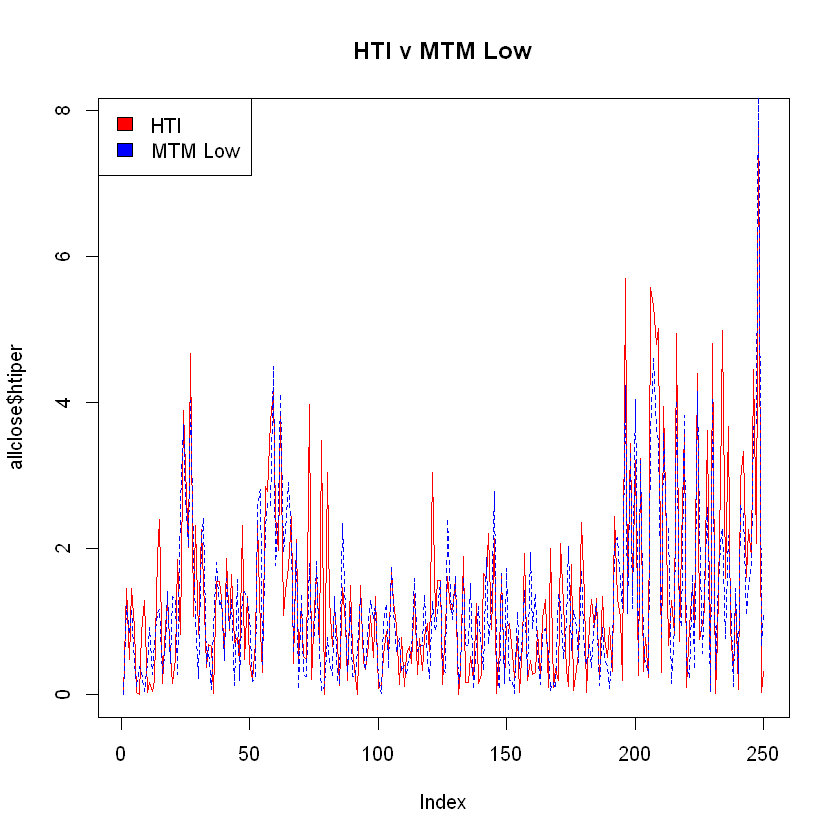

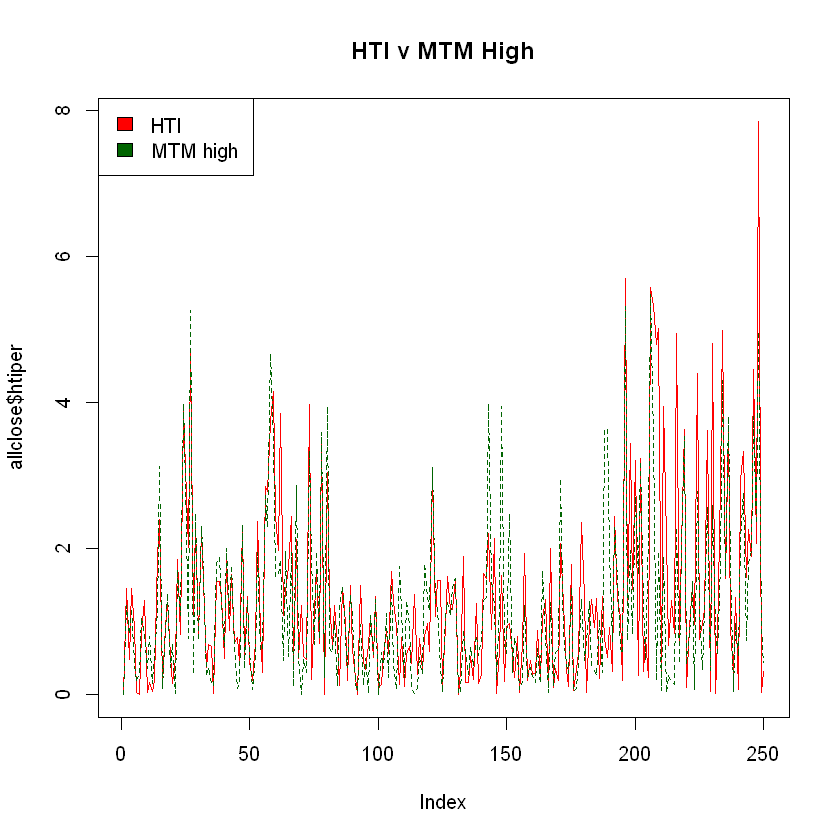

In [288]:
plot(allclose$htiper,type = "l", col="red", lty=1 , main="HTI v MTM Low")
lines(allclose$lowper,col = "blue", lty=2)
legend("topleft", c("HTI","MTM Low"), fill=c("red","blue"))
plot(allclose$htiper,type = "l", col="red", lty=1 , main="HTI v MTM High")
lines(allclose$highper,col = "dark green", lty=2)
legend("topleft", c("HTI","MTM high"), fill=c("red","dark green"))


In [289]:
jpy <- data.frame("jpy_close" = read.csv("USDJPY2018.csv")[,c(5)], "lowmtm" = lowmtm$mtm, "lowper" = 0,
                  "highmtm" = highmtm$mtm, "highper"=0, "lowmtmjpy"=0, "lowperjpy"=0, "highmtmjpy"=0, "highperjpy"=0)
head(jpy)


,jpy_close,lowmtm,lowper,highmtm,highper,lowmtmjpy,lowperjpy,highmtmjpy,highperjpy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,112.287,5000000,0,5000000,0,0,0,0,0
2,112.508,5061134,0,5061134,0,0,0,0,0
3,112.749,5103637,0,5103637,0,0,0,0,0
4,113.055,5164049,0,5164049,0,0,0,0,0
5,113.090,5187004,0,5187004,0,0,0,0,0
6,112.650,5191997,0,5196690,0,0,0,0,0


In [290]:
for(i in 1:250){
    jpy$lowmtmjpy[i]=jpy$jpy_close[i]*jpy$lowmtm[i]
    jpy$highmtmjpy[i]=jpy$jpy_close[i]*jpy$highmtm[i]   
}
head(jpy)

,jpy_close,lowmtm,lowper,highmtm,highper,lowmtmjpy,lowperjpy,highmtmjpy,highperjpy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,112.287,5000000,0,5000000,0,561435000,0,561435000,0
2,112.508,5061134,0,5061134,0,569418079,0,569418079,0
3,112.749,5103637,0,5103637,0,575429991,0,575429991,0
4,113.055,5164049,0,5164049,0,583821527,0,583821527,0
5,113.090,5187004,0,5187004,0,586598251,0,586598251,0
6,112.650,5191997,0,5196690,0,584878454,0,585407102,0


In [291]:
for(i in 2:250){
    
    #low mtm percentage Change USD
    if(jpy$lowmtm[i]>=jpy$lowmtm[i-1]){
        jpy$lowper[i] = ((jpy$lowmtm[i]-jpy$lowmtm[i-1])/jpy$lowmtm[i-1])*100
    }
    else{
        jpy$lowper[i] = ((jpy$lowmtm[i-1]-jpy$lowmtm[i])/jpy$lowmtm[i-1])*100
    }
    
    #high mtm percentage Change USD
    if(jpy$highmtm[i]>=jpy$highmtm[i-1]){
        jpy$highper[i] = ((jpy$highmtm[i]-jpy$highmtm[i-1])/jpy$highmtm[i-1])*100
    }
    else{
        jpy$highper[i] = ((jpy$highmtm[i-1]-jpy$highmtm[i])/jpy$highmtm[i-1])*100
    }
    
    #low mtm percentage Change JPY
    if(jpy$lowmtmjpy[i]>=jpy$lowmtmjpy[i-1]){
        jpy$lowperjpy[i] = ((jpy$lowmtmjpy[i]-jpy$lowmtmjpy[i-1])/jpy$lowmtmjpy[i-1])*100
    }
    else{
        jpy$lowperjpy[i] = ((jpy$lowmtmjpy[i-1]-jpy$lowmtmjpy[i])/jpy$lowmtmjpy[i-1])*100
    }
    
    #high mtm percentage Change JPY
    if(jpy$highmtmjpy[i]>=jpy$highmtmjpy[i-1]){
        jpy$highperjpy[i] = ((jpy$highmtmjpy[i]-jpy$highmtmjpy[i-1])/jpy$highmtmjpy[i-1])*100
    }
    else{
        jpy$highperjpy[i] = ((jpy$highmtmjpy[i-1]-jpy$highmtmjpy[i])/jpy$highmtmjpy[i-1])*100
    }
}
head(jpy)

,jpy_close,lowmtm,lowper,highmtm,highper,lowmtmjpy,lowperjpy,highmtmjpy,highperjpy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,112.287,5000000,0.00000000,5000000,0.0000000,561435000,0.0000000,561435000,0.0000000
2,112.508,5061134,1.22268271,5061134,1.2226827,569418079,1.4219062,569418079,1.4219062
3,112.749,5103637,0.83979339,5103637,0.8397934,575429991,1.0557993,575429991,1.0557993
4,113.055,5164049,1.18369510,5164049,1.1836951,583821527,1.4583069,583821527,1.4583069
5,113.090,5187004,0.44451580,5187004,0.4445158,586598251,0.4756118,586598251,0.4756118
6,112.650,5191997,0.09626384,5196690,0.1867368,584878454,0.2931813,585407102,0.2030604


In [292]:
jpy_low <- data.frame("mtm_usd_per" = jpy$lowper, "mtm_jpy_per" = jpy$lowperjpy)
head(jpy_low)
jpy_high <- data.frame("mtm_usd_per" = jpy$highper, "mtm_jpy_per" = jpy$highperjpy)
head(jpy_high)

,mtm_usd_per,mtm_jpy_per
,<dbl>,<dbl>
1,0.00000000,0.0000000
2,1.22268271,1.4219062
3,0.83979339,1.0557993
4,1.18369510,1.4583069
5,0.44451580,0.4756118
6,0.09626384,0.2931813


,mtm_usd_per,mtm_jpy_per
,<dbl>,<dbl>
1,0.0000000,0.0000000
2,1.2226827,1.4219062
3,0.8397934,1.0557993
4,1.1836951,1.4583069
5,0.4445158,0.4756118
6,0.1867368,0.2030604


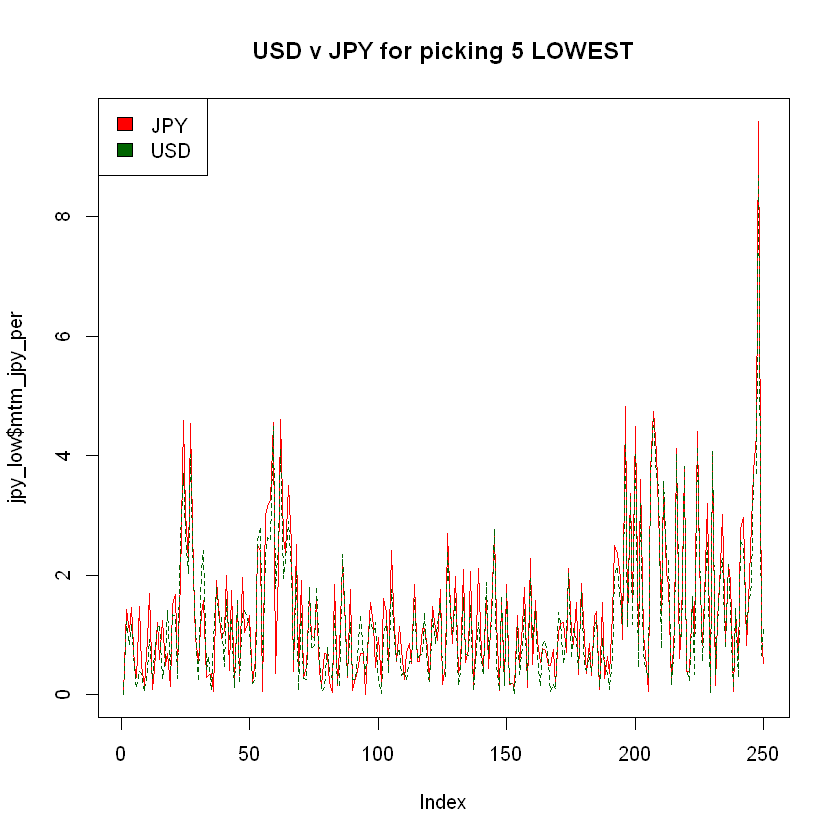

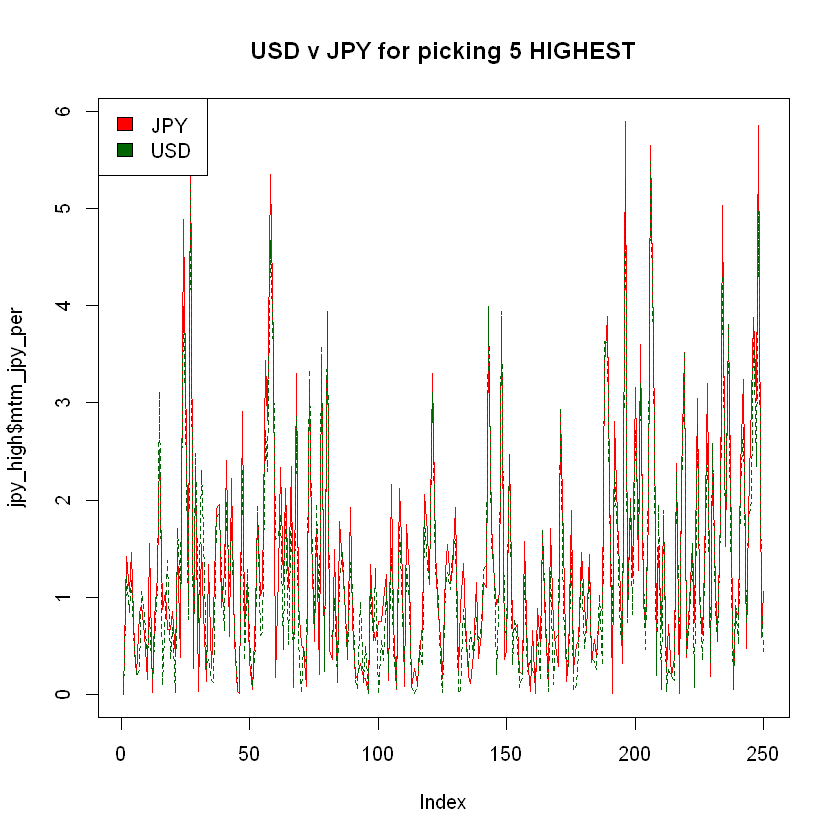

In [293]:
plot(jpy_low$mtm_jpy_per, type="l", col = "red", lty=1, main="USD v JPY for picking 5 LOWEST")
lines(jpy_low$mtm_usd_per,col = "dark green", lty=2)
legend("topleft", c("JPY","USD"), fill=c("red","dark green"))

plot(jpy_high$mtm_jpy_per, type="l", col = "red", lty=1, main="USD v JPY for picking 5 HIGHEST")
lines(jpy_high$mtm_usd_per,col = "dark green", lty=2)
legend("topleft", c("JPY","USD"), fill=c("red","dark green"))

In [294]:
# #######################################################
# ################  OBSERVATIONS  #######################
# #######################################################
# Days was changed to various values as below:

# days=1
# Final amount after buying LOW = $4,652,152
# Final amount after buying HIGH = $5,078,016
# days=2
# Final amount after buying LOW = $5,052,541
# Final amount after buying HIGH = $4,884,465
# days=5
# Final amount after buying LOW = $5,260,997
# Final amount after buying HIGH = $4,810,028
# days=10
# Final amount after buying LOW = $5,359,104
# Final amount after buying HIGH = $4,878,053
# days=25
# Final amount after buying LOW = $5,204,158
# Final amount after buying HIGH = $4,723,215
# days=50
# Final amount after buying LOW = $5,463,547
# Final amount after buying HIGH = $4,631,923
# days=125
# Final amount after buying LOW = $5,217,871
# Final amount after buying HIGH = $4,576,254

# After changing the days to these and some other values we find that 50 is the optimal days 
# interval that maximizes that MTM

# It is also observed that the stratergy "5 days rebalancing of buying low" 
# is always better than "5 days rebalancing of buying high" for most of the
# day intervals except for some days intervals(for example: days = 1)